---
title: "Linear Approximation in 3D"
bibliography: "../../blog.bib"
author: "Peter Amerkhanian"
description: "Using taylor series to approximate function output, with python visuals."
image: thumbnail.png
date: "2024-3-2"
categories: ['Python', 'Calculus']
format:
  html:
    toc: true
    toc-depth: 3
    code-fold: false
    code-tools: true
---

In [1]:
#| code-fold: true
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

The following is a calculus problem that I think provides a good overview of linear approximation, a method for approximating a general function using a linear function. This is a simple application of taylor series approximation, and is used for optics, oscillation, and electric resistivity problems [@noauthor_linear_2023]. The following image from [@strang_calculus_2016-1, chapter 4.4] provides some good intuition of what this approximation looks like:  

![A visual example of linear approximation](approx.jpg){width=350}  

## The Question
Use a tangent plane to approximate the value of the following function at the point $(2.1, -5.1)$.  
$$f(x,y) = \sqrt{42-4x^2-y^2}$$  

Here's some code setup for the question:

In [2]:
f = lambda x, y: np.sqrt(42-4*x**2 - y**2)
range_x = np.linspace(-8, 8, 500)
range_y = range_x.copy()
X, Y = np.meshgrid(range_x, range_y)
Z = f(X, Y)

### Why do we need to approximate this?
We can't just plug in and compute this output because the point (2.1, -5.1) is outside of the domain of this function -- thus $f(2.1, -5.1)$ does not exist.

In [3]:
f(2.1, -5.1)

nan

$$f(2.1, -5.1) \approx \sqrt{-1.65} = DNE$$

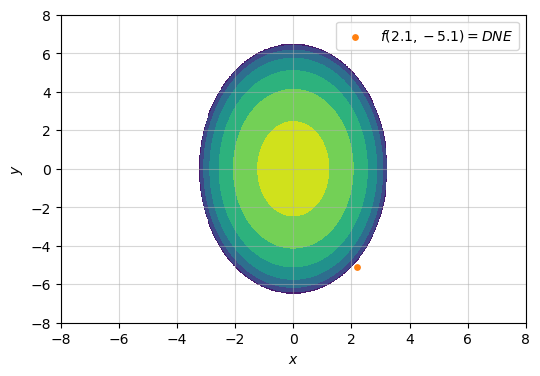

In [4]:
#| code-fold: true
def style_plot(ax, z=False):
    ax.grid(alpha=.5)
    ax.set(xlabel="$x$", ylabel="$y$")
    if z:
        ax.set(zlabel="$z$")

fig, ax = plt.subplots(figsize=(6, 4))
ax.contourf(X, Y, Z)
ax.scatter(x=2.2,
           y=-5.1,
           s=15,
           color='tab:orange',
           label=r"$f(2.1, -5.1) = DNE$")
style_plot(ax)
ax.legend();

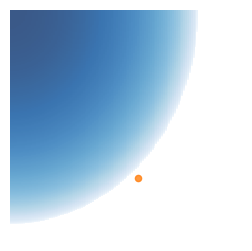

In [15]:
#| output: false
#| echo: false
fig, ax = plt.subplots(figsize=(3, 3))
style = {'color': 'grey', 'linestyle':"--", 'alpha':.3, 'zorder': 2}
# for i in range(-3, 4):
#     ax.axvline(i, **style)
# for i in range(-6, 7):
#     ax.axhline(i, **style)

ax.pcolormesh(X, Y, Z, zorder=4, cmap="Blues", alpha=.8)
ax.scatter(x=2.2,
           y=-5.1,
           s=20,
           color='tab:orange', alpha=.8)
ax.set(xlim=(0, 4), ylim=(-7,0))
ax.set_axis_off()
fig.savefig('thumbnail.png', bbox_inches='tight', dpi=300)

### Developing a linear approximation of the function
To approximate this quantity, we find a nearby point where the function is defined, and construct a tangent plane to extrapolate our quantity of interest. For a nearby point, I select $P_0 = (x_0=2, y_0=-5)$, where the function still produces a real number output:  
$$f(x_0, y_0) = f(2, -5) =\sqrt{1} = 1$$  

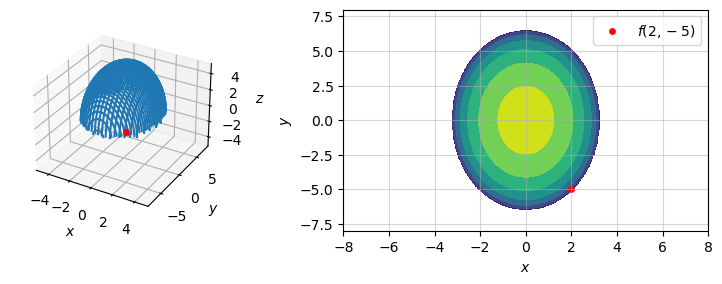

In [6]:
#| code-fold: true
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(122)
ax2 = plt.subplot(121, projection='3d')
# Countour plot
ax1.contourf(X, Y, Z)
ax1.scatter(2, -5, color='red', s=15, label=r"$f(2, -5)$")
ax1.grid(alpha=.5)
ax1.legend()
style_plot(ax1)
# 3d surface
ax2.plot_wireframe(X, Y, Z)
style_plot(ax2, z=True)
ax2.set_box_aspect(None, zoom=0.9)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-8, 8)
ax2.set_zlim(-5, 5)
ax2.scatter(2, -5, f(2, -5), color='red', s=15)
fig.tight_layout()


We then derive a linear approximation of $f$ at this point using the following equation:  

$$
\begin{align}
   L(x, y) = f\left( {{x_0},{y_0}} \right) + {f_x}\left( {{x_0},{y_0}} \right)\left( {x - {x_0}} \right) + {f_y}\left( {{x_0},{y_0}} \right)\left( {y - {y_0}} \right)
\end{align}
$${#eq-a}  

This is really just the first order taylor polynomial of a given function, which, in $\mathbb{R}^3$, represents a tangent plane approximation:



> [...] This equation [...] represents the tangent plane to the surface defined by  $z=f(x,y)$ at the point  $(x_0,y_0)$. The idea behind using a linear approximation is that, if there is a point $(x_0,_0)$ at which the precise value of  $f(x,y)$ is known, then for vales of  $(x,y)$ reasonably close to  $(x_0,y_0)$, the linear approximation (i.e., tangent plane) yields a value that is also reasonably close to the exact value of  $f(x,y)$.  
> 
 -- [@strang_calculus_2016-1, chapter 4.4]


Recall that $f_x$ and $f_y$ refer to components of the gradient vector, $\nabla f$. We calculate that gradient as follows:
$$  
\begin{align*}
\nabla f &= \left< f_x, f_y \right> \\
\nabla f &= \left< \frac{df}{dx}, \frac{df}{dy} \right> \\
    \nabla f &= \left< \frac{-4x}{\sqrt{42-4x^2-y^2}}, \frac{-y}{\sqrt{42-4x^2-y^2}} \right>
\end{align*}
$$
Now we can plug in our point, $P_0$:  
$$
\begin{align*}
\nabla f(P_0) &= \left< {f_x}\left( {{x_0},{y_0}} \right), {f_y}\left( {{x_0},{y_0}} \right) \right> \\
    \nabla f(P_0) &= \left< \frac{-4(2)}{1}, \frac{-(-5)}{1} \right> = \left< -8, 5 \right>
\end{align*}
$$
We now have all elements of the tangent plane/linear approximation, @eq-a, and we can simply plug-in and compute: 
$$
\begin{align*}
         L(x,y) &= f(2, -5) + -8 \left( {x - 2} \right) + 5\left( y - (-5) \right) \\
         L(x,y) &= 1 + -8x + 16 + 5y + 25 \\
         L(x,y) &= -8x + 5y + 42
\end{align*}
$$

In [7]:
L = lambda x, y: -8*x + 5*y + 42

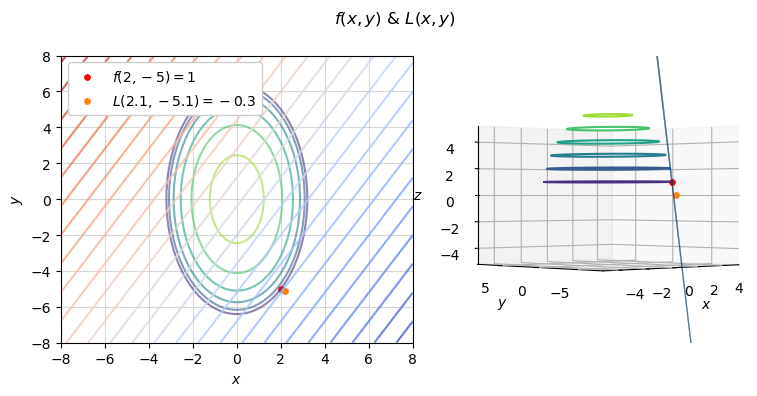

In [8]:
#| code-fold: true
fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121,)
ax2 = plt.subplot(122, projection='3d')
# Countour plot
ax1.contour(X, Y, Z, label=r"$f(x)$", alpha=.6)
ax1.contour(X, Y, L(X, Y), levels= 25, alpha=.8, cmap="coolwarm", label=r"$L(x)$")
ax1.scatter(2, -5, s=15, color='red', label=r"$f(2, -5) = 1$")
ax1.scatter(2.2, -5.1, s=15, color='tab:orange', label=f"$L(2.1, -5.1) = {round(L(2.1, -5.1), 2)}$")
ax1.grid(alpha=.5)
ax1.legend(loc="upper left", framealpha=1)
style_plot(ax1)
# ax1.view_init(-130, -90, 0)
# 3d surface
Z = np.ma.masked_where(Z <= 0, Z)
X = np.ma.masked_where(Z <= 0, X)
Y = np.ma.masked_where(Z <= 0, Y)
ax2.contour3D(X, Y, Z, corner_mask=True)
ax2.plot_surface(X, Y, L(X, Y), alpha=1)
# ax2.contour3D(X, Y, Z, 20, cmap='gray')
style_plot(ax2, z=True)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-8, 8)
ax2.set_zlim(-5, 5)
ax2.scatter(2, -5, f(2, -5), color='red', s=15)
ax2.scatter(2.2, -5.1, s=15, color='tab:orange', label=f"$L(2.1, -5.1) = {round(L(2.1, -5.1), 2)}$")

ax2.view_init(0, -133, 0)
fig.suptitle(r"$f(x, y)$ & $L(x, y)$")
fig.tight_layout()

With that linear approximation established, we can now estimate our original quantity of interest, $f(2.1, -5.1)$.
$$f(2.1, -5.1) \approx L(2.1, -5.1) = -8(2.1) + 5(-5.1) + 42 \approx \boxed{-0.3} $$

In [9]:
L(2.1, -5.1)

-0.29999999999999716